In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from soccerplots.radar_chart import Radar

In [2]:
df = pd.read_csv("C:\\Users\\joyan\\OneDrive\\Documents\\Sports Analytics\\Data\\ISL Mid per 90.csv")

In [9]:
df['Name'].unique()

array(['Alberto Noguera', 'Vicente Gómez', 'Javi Hernández',
       'Jacques Maghoma', 'Aitor Monroy', 'Federico Gallego', 'Edu Bedia',
       'Edu Garcia', 'Hugo Boumous', 'Apuia', 'Carl McHugh',
       'Jerry Mawihmingthanga', 'Ahmed Jahouh', 'Cy Goddard',
       'Matti Steinmann', 'Alex', 'Dimas Delgado', 'Prabir Das',
       'Brandon Fernandes', 'Pronay Halder', 'Memo', 'Holicharan Narzary',
       'João Victor', 'Rowllin Borges', 'Anirudh Thapa', 'Khassa Camara',
       'Lenny Rodrigues', 'Lallianzuala Chhangte', 'Hitesh Sharma',
       'Mohammad Yasir', 'Narayan Das', 'Cole Alexander',
       'Issac Vanmalsawma', 'Th. Bipin Singh', 'Erik Paartalu',
       'Facundo Pereyra', 'Suresh Wangjam Singh', 'Vinit Rai',
       'Glan Martins', 'Princeton Rebello', 'Mohammed Rafique',
       'Sahal Abdul Samad', 'Lluis Sastre', 'Rahul Kannoly',
       'Fatkhullo Fatkhulloev', 'Nandhakumar Sekar', 'Deepak Tangri',
       'Jackichand Singh', 'Jeakson Thounaojam', 'Raynier Fernandes',
       'A

In [10]:
df = df[(df['Name']=='Lallianzuala Chhangte') | (df['Name']=='Th. Bipin Singh')].reset_index()

In [12]:
df.columns

Index(['index', 'Name', 'Nationality', 'Minutes', '90s', 'keypasses',
       'total_passes', 'acc_passes', 'Accurate opposition half passes',
       'Accurate final third passes', 'Inaccurate passes',
       'Big chances created', 'Accurate own half passes', 'Tackles',
       'Interceptions', 'Total duels won', 'Possession lost', 'Dispossessed',
       'Was fouled', 'Succ. dribbles', 'Total shots', 'Shots on target'],
      dtype='object')

In [13]:
df =  df.drop(['index','Nationality','Was fouled','Minutes', 
               '90s','Possession lost','Accurate opposition half passes',
               'total_passes','Inaccurate passes', 'Accurate own half passes',
               'Tackles','Interceptions', 'Total duels won', 'Possession lost',
              ],axis=1)

In [14]:
df

,Name,keypasses,acc_passes,Accurate final third passes,Big chances created,Dispossessed,Succ. dribbles,Total shots,Shots on target
0,Lallianzuala Chhangte,2.15,31.36,11.00,0.77,2.84,2.41,3.44,1.46
1,Th. Bipin Singh,3.53,34.93,14.75,0.38,1.51,1.64,3.28,1.01


In [15]:
params = list(df.columns)
params = params[1:]
params

['keypasses',
 'acc_passes',
 'Accurate final third passes',
 'Big chances created',
 'Dispossessed',
 'Succ. dribbles',
 'Total shots',
 'Shots on target']

In [31]:
ranges = []
a_values = [] #apuia
b_values = [] #rowlin

for x in params:
    a = min(df[params][x])
    a = a - (a*.15)
    
    b = max(df[params][x])
    b = b + (b*.15)
    
    ranges.append((a,b))
    
for x in range(len(df['Name'])):
    if df['Name'][x] == 'Lallianzuala Chhangte':
        a_values = df.iloc[x].values.tolist()
    if df['Name'][x] == 'Th. Bipin Singh':
        b_values = df.iloc[x].values.tolist()

values = [a_values[1:],b_values[1:]]

In [28]:
values

[[2.15, 31.36, 11.0, 0.77, 2.84, 2.41, 3.44, 1.46],
 [3.53, 34.93, 14.75, 0.38, 1.51, 1.64, 3.28, 1.01]]

In [33]:
title = dict(
    title_name='Lallianzuala Chhangte',
    title_color = 'red',
    subtitle_name = 'Chennaiyan FC',
    subtitle_color = 'red',
    title_name_2='Bipin Singh',
    title_color_2 = 'blue',
    subtitle_name_2 = 'MCFC',
    subtitle_color_2 = 'blue',
    title_fontsize = 18,
    subtitle_fontsize=15
)

endnote = '@BhathenaJoyan\ndata via SOFASCORE\n All stats per 90\n ISL 2020-21'

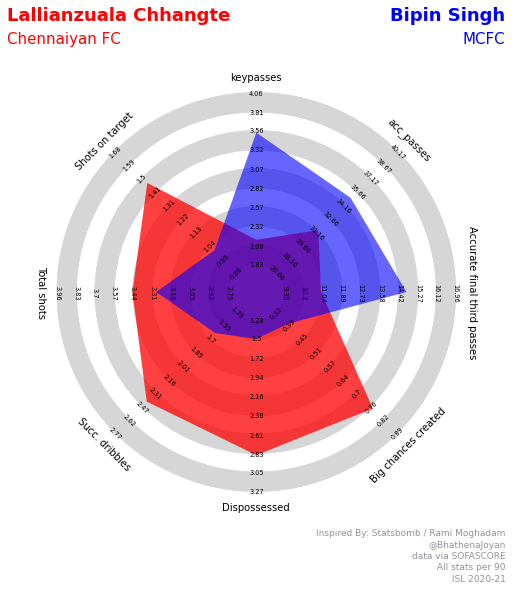

In [34]:
radar = Radar()

fig,ax = radar.plot_radar(ranges=ranges,params=params,values=values,
                         radar_color=['red','blue'],
                         alphas=[.75,.6],title=title,endnote=endnote,
                         compare=True)
plt.savefig("C:\\Users\\joyan\\OneDrive\\Documents\\Sports Analytics\\Visualisations\\chhangte vs bipin.png",
            dpi=300,bbox_inches = 'tight')